# Nonlinear Partial Least Squares Regression

## Background

- **Problem**: if there is nonlinear relation in the data, linear PLSR can be insufficient to approximate it  

- There are two approaches to nonlinear PLSR:

    - **Approach 1**: Reproject the original data using a nonlinear function 

    - **Approach 2**: Replace the inner relation function in PLSR with a non-linear function

## Approach 1
- Reproject the original data using a nonlinear function 


## Data transform
- Based on mapping the original data $\textbf{X}$ using a non-linear function to new data space
- After mapping the data to the new space, linear PLSR is applied
- Example:
$\textbf{x} = (x_1, x_2) \rightarrow f(\textbf{x}) = (x_1^2, \sqrt{x_2})$




## Kernel PLSR
- Kernel PLSR models complex nonlinear relationships by using the kernel trick.
- Instead of explicitly transforming $X$ into a high-dimensional space, it computes inner products in this space through a kernel function.


## Kernel PLSR
- Common kernel functions include:
    - Linear Kernel: $K(x_i, x_j) = x_i^\top x_j$
    - Polynomial Kernel: $K(x_i, x_j) = (x_i^\top x_j + c)^d$
    - Radial Basis Function (RBF) Kernel / Gaussian Kernel: $K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$

## Splines
- Splines are piecewise polynomial functions used to approximate nonlinear relationships.
- The input space is divided into intervals, and a lower-degree polynomial is fitted within each interval and tied with "knots".
- Applied to predictor variables before PLSR to capture local nonlinearities in the data.
- Locally Weighted PLSR (LW-PLSR) or Local PLSR builds local models for subsets of the data to handle nonlinearities.
- The global nonlinear relationship between $X$ and $Y$ is approximated by fitting linear models to local regions.


## Approach 2
- Replace the inner relation function in PLSR with a non-linear function

## Background

PLSR seeks to maximize: 

$cov(\textbf{t}, \textbf{u}) = cov(\textbf{X}\textbf{w}, \textbf{Y}\textbf{c})$

by finding the weight vectors $\textbf{w} = \frac{\textbf{w}}{ \textrm{norm}(\textbf{w})}$ and $\textbf{c} = \frac{\textbf{y}^T  \textbf{t}}{\textbf{t}^T  \textbf{t}} $ 

$\textbf{T}$: X-scores, $\textbf{U}$: Y-scores

$\textbf{P}$: X-loadings, $\textbf{Q}$: Y-loadings

$\textbf{W}$: Loadings weights

## NIPALS Algorithm

In order to find the weight vectors, we can use an iterative method called the Nonlinear Iterative Partial Least Squares algorithm:

Step 1: $\textbf{w} = \frac{\textbf{X}^T \textbf{u}}{\textbf{u}^T \textbf{u}}$

Step 2: $\| \textbf{w} \| = 1$

Step 3: $\textbf{t} = \textbf{X} \textbf{w}$ 

Step 4: $\textbf{c} = \frac{\textbf{Y}^T \textbf{t}}{\textbf{t}^T \textbf{t}}$

Step 5: $\| \textbf{c} \| = 1$

Step 6: $\textbf{u} = \textbf{Y} \textbf{c}$ 

The steps are repeated until convergence.

## NIPALS Algorithm

**Observation**: $\textbf{t}$ is used to calculate $\textbf{u}$ and $\textbf{u}$ is used to calculate $\textbf{t}$

In linear PLSR, there is a linear relation between the X-scores $\textbf{T}$ and the Y-scores $\textbf{U}$

$\textbf{U} = \textbf{T} \textbf{D} + \textbf{H}$

where $\textbf{D}$ is a diagonal matrix relating the X-scores and Y-scores and where $\textbf{H}$ represents residual values

This relation is called the **inner relation**

## Nonlinear Inner Relation

$\textbf{u} = g(\textbf{t}) + \textbf{h}$

Using Step 3, it can be rewritten as:

$\textbf{u} = g(\textbf{X}, \textbf{w}) + \textbf{h}$

$g(\textbf{X}, \textbf{w})$ can be replaced by a nonlinear function

## Example: Linear vs Non-linear PLSR (Approach 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.cross_decomposition import PLSRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Step 1: Generate a Nonlinear Dataset
np.random.seed(42)
n_samples = 100
n_features = 5

# X: 100 samples, 5 features
X = np.random.rand(n_samples, n_features)

# Y: A highly nonlinear function of X
Y = (np.sin(2 * np.pi * X[:, 0]) +
     0.5 * np.exp(X[:, 1]) +
     0.3 * X[:, 2]**3 +
     0.2 * np.random.randn(n_samples))

# Y = X[:, 0] + X[:, 1]**2 + np.sin(X[:,3])

# Reshape Y to be (n_samples, 1)
Y = Y.reshape(-1, 1)


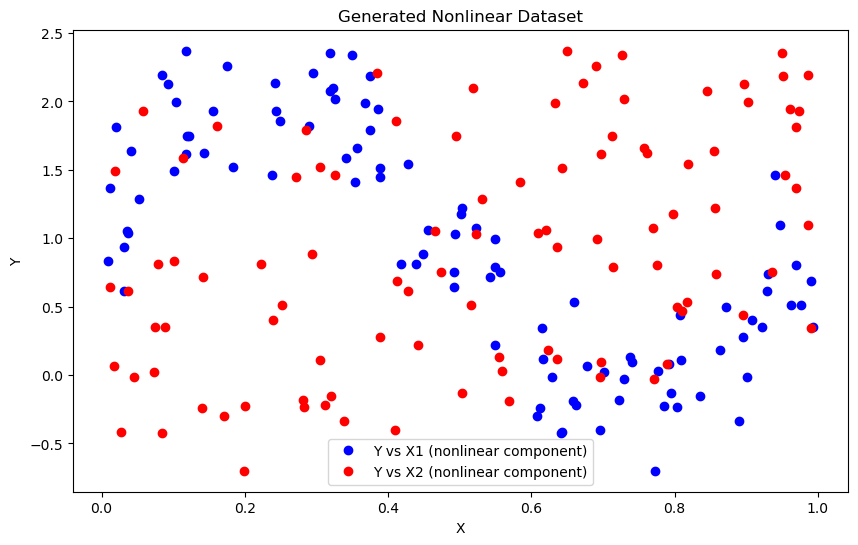

In [3]:
# Plot Y against X to visualize the nonlinearity
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], Y, 'bo', label='Y vs X1 (nonlinear component)')
plt.plot(X[:, 1], Y, 'ro', label='Y vs X2 (nonlinear component)')
plt.title('Generated Nonlinear Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# Step 2: Linear PLSR
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply linear PLS regression (2 components)
pls_linear = PLSRegression(n_components=2)
pls_linear.fit(X_scaled, Y)

# Predict Y using the linear PLSR model
Y_pred_linear = pls_linear.predict(X_scaled)

# Calculate RMSE for Linear PLSR
rmse_linear = np.sqrt(mean_squared_error(Y, Y_pred_linear))
print(f"Linear PLSR RMSE: {rmse_linear:.4f}")

Linear PLSR RMSE: 0.4739


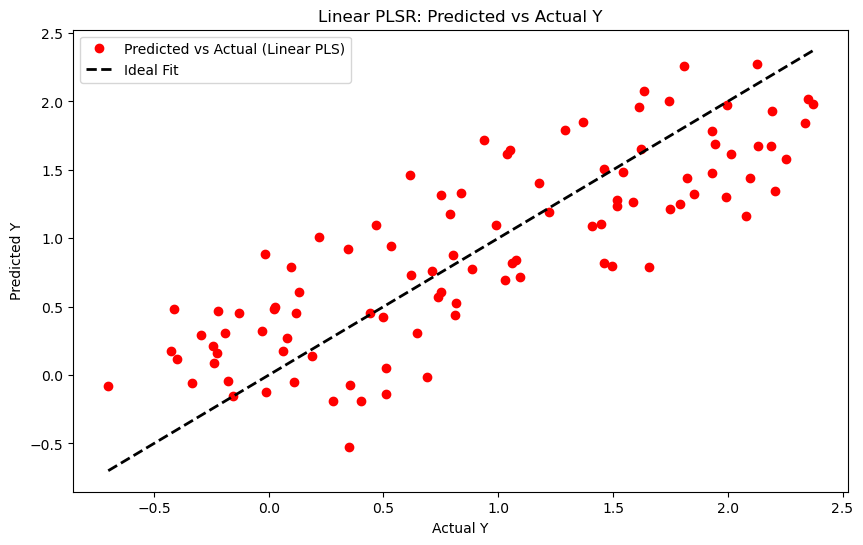

In [4]:
# Plot predicted vs actual Y for linear PLSR
plt.figure(figsize=(10, 6))
plt.plot(Y, Y_pred_linear, 'ro', label='Predicted vs Actual (Linear PLS)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Linear PLSR: Predicted vs Actual Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()


In [ ]:
# Step 3a: Kernel-Based Nonlinear PLSR Using RBF Kernel
# Apply Kernel Ridge Regression (RBF kernel)
kernel_model = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)
kernel_model.fit(X_scaled, Y)

# Predict Y using the kernel ridge regression model
Y_pred_nonlinear = kernel_model.predict(X_scaled)

# Calculate RMSE for Nonlinear PLSR (Kernel Ridge)
rmse_nonlinear_rbf = np.sqrt(mean_squared_error(Y, Y_pred_nonlinear))
print(f"Nonlinear PLSR (RBF Kernel) RMSE: {rmse_nonlinear_rbf:.4f}")


Nonlinear PLSR (RBF Kernel) RMSE: 0.4291


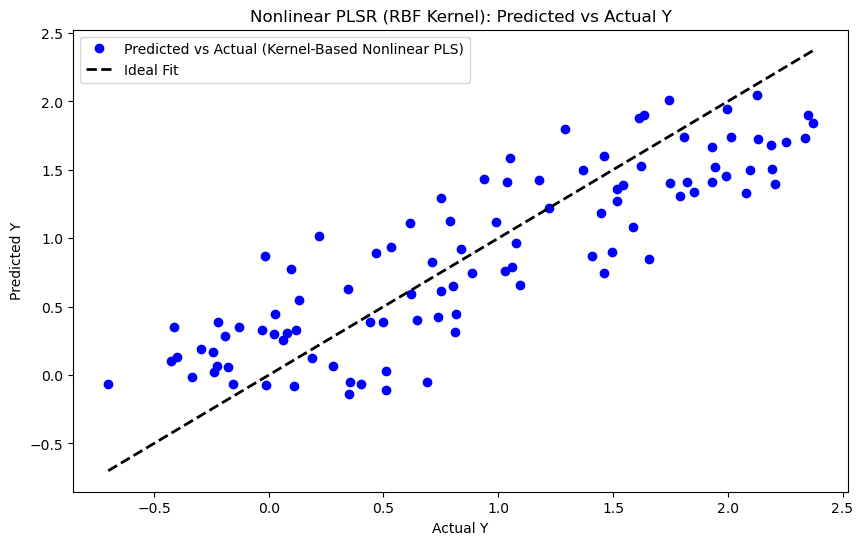

In [5]:
# Plot predicted vs actual Y for kernel-based nonlinear PLS
plt.figure(figsize=(10, 6))
plt.plot(Y, Y_pred_nonlinear, 'bo', label='Predicted vs Actual (Kernel-Based Nonlinear PLS)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Nonlinear PLSR (RBF Kernel): Predicted vs Actual Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()


In [ ]:
# Step 3b: Nonlinear PLSR with Polynomial Inner Relation
# Get the latent variables (X scores) from linear PLSR
T_linear = pls_linear.x_scores_

# Apply Polynomial transformation to the latent variables (degree 2 for nonlinearity)
poly = PolynomialFeatures(degree=2)
T_poly = poly.fit_transform(T_linear)

# Fit a linear regression on the transformed latent variables
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(T_poly, Y)

# Predict Y using the polynomial-transformed latent variables
Y_pred_nonlinear = reg.predict(T_poly)

# Calculate RMSE for Nonlinear PLSR (Polynomial Inner Relation)
rmse_nonlinear_poly = np.sqrt(mean_squared_error(Y, Y_pred_nonlinear))
print(f"Nonlinear PLSR (Polynomial Inner Relation) RMSE: {rmse_nonlinear_poly:.4f}")

Nonlinear PLSR (Polynomial Inner Relation) RMSE: 0.4685


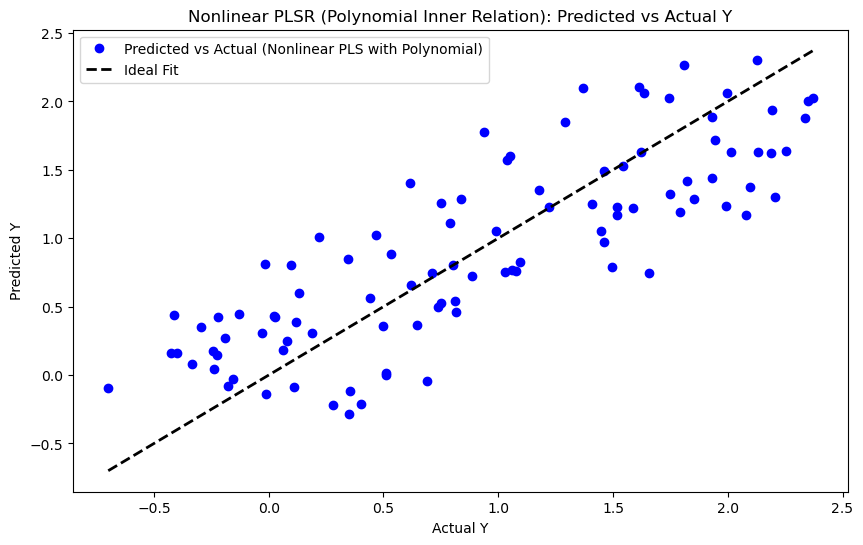

In [6]:
# Plot predicted vs actual Y for Nonlinear PLSR (Polynomial Inner Relation)
plt.figure(figsize=(10, 6))
plt.plot(Y, Y_pred_nonlinear, 'bo', label='Predicted vs Actual (Nonlinear PLS with Polynomial)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Nonlinear PLSR (Polynomial Inner Relation): Predicted vs Actual Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

In [ ]:
# Step 3c: Nonlinear PLSR with Spline Inner Relation
# Get the latent variables (X scores) from linear PLSR
T_linear = pls_linear.x_scores_

# Apply Spline transformation to the latent variables
spline_transformer = SplineTransformer(degree=3, n_knots=5)
T_spline = spline_transformer.fit_transform(T_linear)

# Fit a linear regression on the transformed latent variables
reg = LinearRegression()
reg.fit(T_spline, Y)

# Predict Y using the spline-transformed latent variables
Y_pred_nonlinear = reg.predict(T_spline)

# Calculate RMSE for Nonlinear PLSR (Spline Inner Relation)
rmse_nonlinear_spline = np.sqrt(mean_squared_error(Y, Y_pred_nonlinear))
print(f"Nonlinear PLSR (Spline Inner Relation) RMSE: {rmse_nonlinear_spline:.4f}")

Nonlinear PLSR (Spline Inner Relation) RMSE: 0.4355


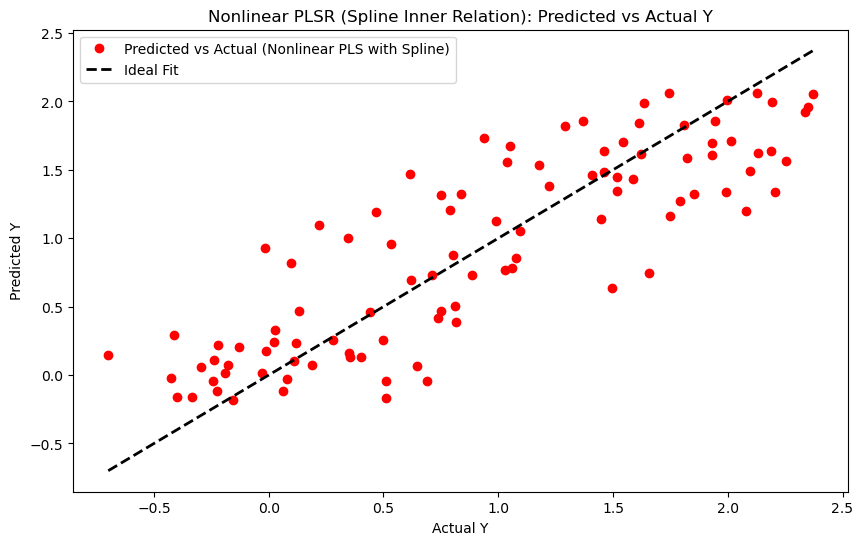

In [7]:
# Plot predicted vs actual Y for Nonlinear PLSR (Spline Inner Relation)
plt.figure(figsize=(10, 6))
plt.plot(Y, Y_pred_nonlinear, 'ro', label='Predicted vs Actual (Nonlinear PLS with Spline)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Nonlinear PLSR (Spline Inner Relation): Predicted vs Actual Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

In [ ]:
# Step 3d: Nonlinear PLSR with Piecewise Linear Inner Relation
# Get the latent variables (X scores) from linear PLSR
T_linear = pls_linear.x_scores_

# Apply piecewise linear regression on the latent variables
# We'll use a decision tree regressor with shallow depth to simulate piecewise linearity
tree_reg = DecisionTreeRegressor(max_depth=2)  # Shallow tree simulating piecewise linearity
tree_reg.fit(T_linear, Y)

# Predict Y using the piecewise linear model
Y_pred_nonlinear = tree_reg.predict(T_linear)

# Calculate RMSE for Nonlinear PLSR (Piecewise Linear Inner Relation)
rmse_nonlinear_piecewise = np.sqrt(mean_squared_error(Y, Y_pred_nonlinear))
print(f"Nonlinear PLSR (Piecewise Linear Inner Relation) RMSE: {rmse_nonlinear_piecewise:.4f}")

Nonlinear PLSR (Piecewise Linear Inner Relation) RMSE: 0.4351


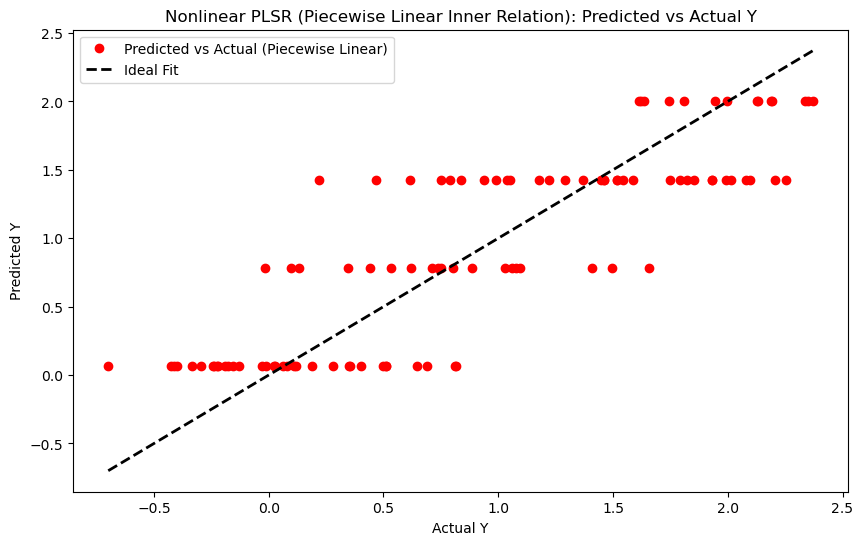

In [8]:
# Plot predicted vs actual Y for Nonlinear PLSR (Piecewise Linear Inner Relation)
plt.figure(figsize=(10, 6))
plt.plot(Y, Y_pred_nonlinear, 'ro', label='Predicted vs Actual (Piecewise Linear)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Nonlinear PLSR (Piecewise Linear Inner Relation): Predicted vs Actual Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()



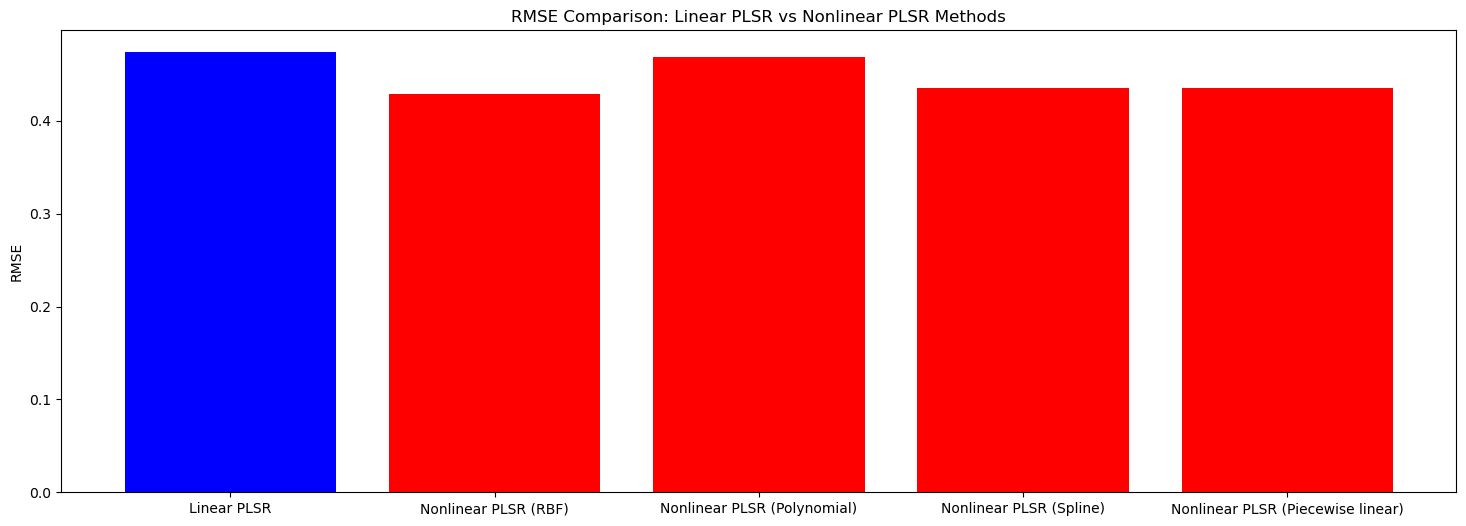

In [9]:
# Step 4: Compare RMSE in a Bar Graph
plt.figure(figsize=(18, 6))
methods = ['Linear PLSR', 'Nonlinear PLSR (RBF)', 'Nonlinear PLSR (Polynomial)', 'Nonlinear PLSR (Spline)', 'Nonlinear PLSR (Piecewise linear)']
rmse_values = [rmse_linear, rmse_nonlinear_rbf, rmse_nonlinear_poly, rmse_nonlinear_spline, rmse_nonlinear_piecewise]
plt.bar(methods, rmse_values, color=['blue', 'red', 'red', 'red', 'red'])
plt.title('RMSE Comparison: Linear PLSR vs Nonlinear PLSR Methods')
plt.ylabel('RMSE')
plt.show()


## Example: Inner Relation (Approach 2)

In [20]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

from hypso import Hypso1

from nipals import PLS
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from numpy import dot, zeros
from numpy import linalg
from numpy.linalg import svd, pinv

from scipy.linalg import pinv as pinv2

In [2]:
l1a_nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-05-05_1039Z-l1a.nc'
satobj = Hypso1(path=l1a_nc_file, verbose=True)
datacube = satobj.l1a_cube.to_numpy()

x_data = datacube.reshape(datacube.shape[0]*datacube.shape[1], -1)
y_data = x_data[:,100]**2 / x_data[:,50]

print(x_data.shape)
print(y_data.shape)

[INFO] Loading L1a capture roervik_2024-05-05_1039Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] No georeferencing .points file provided. Skipping georeferencing.
(653016, 120)
(653016,)


In [3]:
def _svd_flip_1d(u, v):
    """Same as svd_flip but works on 1d arrays, and is inplace"""
    # svd_flip would force us to convert to 2d array and would also return 2d
    # arrays. We don't want that.
    biggest_abs_val_idx = np.argmax(np.abs(u))
    sign = np.sign(u[biggest_abs_val_idx])
    u *= sign
    v *= sign

def _center_scale_xy(X, Y, scale=True):
    """Center X, Y and scale if the scale parameter==True

    Returns
    -------
        X, Y, x_mean, y_mean, x_std, y_std
    """
    # center
    x_mean = X.mean(axis=0)
    X = X - x_mean
    y_mean = Y.mean(axis=0)
    Y = Y - y_mean
    # scale
    if scale:
        x_std = X.std(axis=0, ddof=1)
        x_std[x_std == 0.0] = 1.0
        X /= x_std
        y_std = Y.std(axis=0, ddof=1)
        y_std[y_std == 0.0] = 1.0
        Y /= y_std
    else:
        x_std = np.ones(X.shape[1])
        y_std = np.ones(Y.shape[1])
    return X, Y, x_mean, y_mean, x_std, y_std

In [13]:
def _get_first_singular_vectors_power_method(
    X, Y, mode="A", max_iter=1000, tol=1e-06, norm_y_weights=False
):
    """Return the first left and right singular vectors of X'Y.

    Provides an alternative to the svd(X'Y) and uses the power method instead.
    With norm_y_weights to True and in mode A, this corresponds to the
    algorithm section 11.3 of the Wegelin's review, except this starts at the
    "update saliences" part.
    """

    eps = 1e-8
    #eps = np.finfo(X.dtype).eps
    try:
        #y_score = next(col for col in Y.T if np.any(np.abs(col) > eps))
        y_score = next(col for col in Y.T if np.any(np.abs(col) > eps))
    except StopIteration as e:
        raise StopIteration("y residual is constant") from e

    x_weights_old = 100  # init to big value for first convergence check

    for i in range(max_iter):

        x_weights = np.dot(X.T, y_score) / np.dot(y_score, y_score)

        x_weights = x_weights / np.sqrt(np.dot(x_weights, x_weights)) + eps

        x_score = np.dot(X, x_weights)
        #x_score = 1 / (100 + np.exp(-np.dot(X, x_weights)))

        y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)

        if norm_y_weights:
            y_weights /= np.sqrt(np.dot(y_weights, y_weights)) + eps

        y_score = np.dot(Y, y_weights) / (np.dot(y_weights, y_weights) + eps)

        x_weights_diff = x_weights - x_weights_old

        if np.dot(x_weights_diff, x_weights_diff) < tol or Y.shape[1] == 1:
            break

        x_weights_old = x_weights

    n_iter = i + 1
    if n_iter == max_iter:
        print("Maximum number of iterations reached")


    return x_weights, y_weights, n_iter




In [14]:
def plsr(X, y, n_components):

    deflation_mode = "regression"
    scale = True
    n = X.shape[0]
    p = X.shape[1]
    q = y.shape[0]

    # Scale (in place)
    Xk, yk, _x_mean, _y_mean, _x_std, _y_std = _center_scale_xy(
        X, y, scale
    )

    x_weights_ = np.zeros((p, n_components))  # U
    y_weights_ = np.zeros((q, n_components))  # V
    _x_scores = np.zeros((n, n_components))  # Xi
    _y_scores = np.zeros((n, n_components))  # Omega
    x_loadings_ = np.zeros((p, n_components))  # Gamma
    y_loadings_ = np.zeros((q, n_components))  # Delta
    n_iter_ = []

    # This whole thing corresponds to the algorithm in section 4.1 of the
    # review from Wegelin. See above for a notation mapping from code to
    # paper.
    #y_eps = np.finfo(yk.dtype).eps
    for k in range(n_components):
        # Find first left and right singular vectors of the X.T.dot(Y)
        # cross-covariance matrix.

        # Replace columns that are all close to zero with zeros
        #yk_mask = np.all(np.abs(yk) < 10 * y_eps, axis=0)
        yk_mask = np.all(np.abs(yk) < 1e-8, axis=0)
        yk[:, yk_mask] = 0.0

        try:
            (
                x_weights,
                y_weights,
                n_iter_val,
            ) = _get_first_singular_vectors_power_method(
                Xk,
                yk,
                #mode=self.mode,
                max_iter=500,
                tol=1e-06,
            )
        except StopIteration as e:
            if str(e) != "y residual is constant":
                raise
            #warnings.warn(f"y residual is constant at iteration {k}")
            break

        n_iter_.append(n_iter_val)

        # inplace sign flip for consistency across solvers and archs
        _svd_flip_1d(x_weights, y_weights)

        # compute scores, i.e. the projections of X and Y
        x_scores = np.dot(Xk, x_weights)

        y_ss = np.dot(y_weights, y_weights)
        y_scores = np.dot(yk, y_weights) / y_ss

        # Deflation: subtract rank-one approx to obtain Xk+1 and Yk+1
        x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
        Xk -= np.outer(x_scores, x_loadings)

        if deflation_mode == "canonical":
            # regress Yk on y_score
            y_loadings = np.dot(y_scores, yk) / np.dot(y_scores, y_scores)
            yk -= np.outer(y_scores, y_loadings)
        if deflation_mode == "regression":
            # regress Yk on x_score
            y_loadings = np.dot(x_scores, yk) / np.dot(x_scores, x_scores)
            yk -= np.outer(x_scores, y_loadings)

        x_weights_[:, k] = x_weights
        y_weights_[:, k] = y_weights
        _x_scores[:, k] = x_scores
        _y_scores[:, k] = y_scores
        x_loadings_[:, k] = x_loadings
        y_loadings_[:, k] = y_loadings

    # X was approximated as Xi . Gamma.T + X_(R+1)
    # Xi . Gamma.T is a sum of n_components rank-1 matrices. X_(R+1) is
    # whatever is left to fully reconstruct X, and can be 0 if X is of rank
    # n_components.
    # Similarly, y was approximated as Omega . Delta.T + y_(R+1)

    # Compute transformation matrices (rotations_). See User Guide.
    x_rotations_ = np.dot(
        x_weights_,
        pinv2(np.dot(x_loadings_.T, x_weights_), check_finite=False),
    )
    #y_rotations_ = np.dot(
    #    y_weights_,
    #    pinv2(np.dot(y_loadings_.T, y_weights_), check_finite=False),
    #)
    coef_ = np.dot(x_rotations_, y_loadings_.T)
    coef_ = (coef_ * _y_std).T / _x_std
    intercept_ = _y_mean
    _n_features_out = x_rotations_.shape[1]

    #z = z - _x_mean
    #Ypred = z @ coef_.T + intercept_

    return x_weights_, y_weights_, _x_scores, _y_scores, x_loadings_, y_loadings_, coef_, intercept_, _x_mean


In [18]:
n_components = 20

X = x_data[::600, :]
y = y_data[::600].reshape(-1,1)

x_weights, y_weights, x_scores, y_scores, x_loadings, y_loadings, coef, intercept, x_mean = plsr(X=X, y=y, n_components=20)

In [ ]:
    for i in range(max_iter):

        x_weights = np.dot(X.T, y_score) / np.dot(y_score, y_score)

        x_weights = x_weights / np.sqrt(np.dot(x_weights, x_weights)) + eps

        # t = X w
        x_score = np.dot(X, x_weights)
        #x_score = 1 / (100 + np.exp(-np.dot(X, x_weights)))

        y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)

        if norm_y_weights:
            y_weights /= np.sqrt(np.dot(y_weights, y_weights)) + eps

        y_score = np.dot(Y, y_weights) / (np.dot(y_weights, y_weights) + eps)

        x_weights_diff = x_weights - x_weights_old

        if np.dot(x_weights_diff, x_weights_diff) < tol or Y.shape[1] == 1:
            break

        x_weights_old = x_weights

In [19]:
i = 20004
z = x_data[i,:]
print(y_data[i])

z = z - x_mean
Ypred = z @ coef.T + intercept

print(Ypred[0])

2.628476084538376
2.5686970690330155


## Summary

- Non-linear PLSR can be used to approximate nonlinear relations in the data
    - Approach 1: Reproject the original data using a nonlinear function 
    - Approach 2: Replace the inner relation function in PLSR with a non-linear function

## Sources:
- Nonlinear Partial Least Squares: An Overview
- TK8117 PLSR lecture
- SciKit-learn PLSR